# Project Plan

## The Data 

The dataset was produced by "TRUSTTHEDATA" to accurately replicate real-world banking circumstances, but it is not genuine (simulated). The dataset mimics banking circumstances, even if the provided data is fake. It is used for testing, predictive modeling, and exploratory data analysis. The dataset's dependability comes from its ability to replicate real-world banking events, protecting client privacy while still allowing for analysis and modeling procedures, even if it is not based on real-world data.

This dataset representation enables an in-depth understanding of consumer preferences in the banking business, facilitating strategic assessments for client retention and product enhancement plans.

Source: [Predicting Churn for Bank Customers - Kaggle](https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers/)


## Project Aim and Objectives 

<h4>The banking sector is becoming more and more competitive, making customer retention essential to expansion and profitability. Industry studies indicate that banks spend five times as much on attracting new clients as on keeping old ones. However, in the lack of data-driven insights, identifying those who are most likely to cancel accounts and withdraw remains difficult. Some of the factors like poor customer service, the geography of the bank, credit scores, etc directly or indirectly influence this attrition. Analyzing these factors with the help of ML models can give insights to focus on strategies. The goal of this project is to create a sophisticated predictive classification model that uses machine learning models to identify the factors that affect customer churn threats and provide banks with focused intervention strategies.</h4>


### Specific Objective(s)


* <b> Objective 1: </b> Explore data extensively to identify key factors impacting customer churn, aiming to unveil critical patterns influencing their decision to leave
* <b> Objective 2: </b> To statistically examine the impact of identified independent factors on the dependent variable through hypothesis testing. Determine whether there is a significant association, providing empirical evidence to inform the understanding of key relationships and contribute to data-driven decision-making.
* <b> Objective 3: </b>  Prepare the dataset by implementing a thorough data transformation pipeline and building diverse classification models using various algorithms
* <b> Objective 4: </b> Evaluate the performance of the constructed models, compare their results using specified metrics, perform Hyper-parameter tuning, and finalize the most effective classification model for accurate predictions on the dataset.

## System Design 


### Architecture


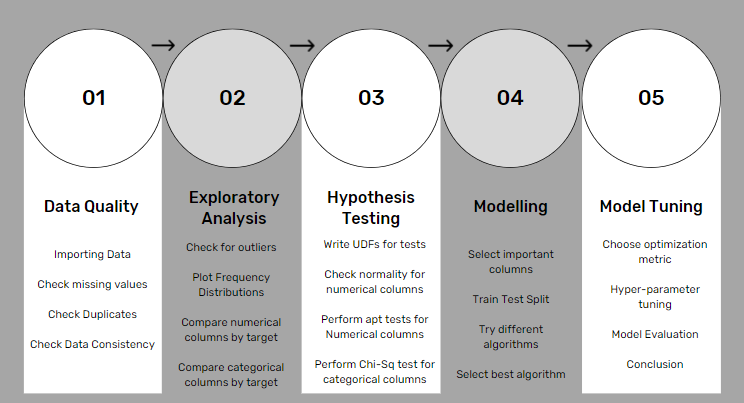
  
The coursework process unfolds in five stages:

1. **Data Quality Assessment:** The initial stage involves a thorough examination of data quality, addressing any issues and discrepancies.

2. **Exploratory Analysis:** Numerical columns are scrutinized for outliers, and patterns related to the target column are identified.

3. **Hypothesis Testing:** Interesting patterns discovered in the exploration phase are rigorously tested for mathematical validation to inform the subsequent stages.

4. **Model Development:** After selecting independent factors impacting the target variable, multiple classification models are built, and their baseline performances are compared.

5. **Model Tuning:** The most promising model is chosen and refined for enhanced performance in this final stage.

### Processing Modules and Algorithms


1. Identifying outliers in numerical columns using the IQR method
2. Box and Whiskers plot for comparing the distribution of different numerical columns based on the target column
3. Frequency distribution plot to compare counts by the target column
4. Testing the normality of numerical columns by the Anderson-Darling test
5. T-test or Mann-Whitney U test for testing the relationship between numerical columns and the target column
6. Chi-square test for testing the relationship between categorical columns and target columns.
7. Logistic Regression, Random Forest, Gradient Boosting, and XGBoost Classification algorithms
8. Hyperparameter tuning using Grid Search CV


# Program Code 



<h4> Importing Required libraries <h4>

In [63]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os
from scipy.stats import chi2_contingency, pointbiserialr, shapiro, levene, ttest_ind, mannwhitneyu, anderson
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from scipy.stats import boxcox
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [64]:
class style:
    BOLD = '\033[1m'
    END = '\033[0m'

<h5> Calculating total lines of code </h5>

In [1]:
"""from json import load
from sys import argv
def loc(nb):
    cells = load(open('A3_Data_Analysis_Project.ipynb'))['cells']
    return sum(len(c['source']) for c in cells if c['cell_type'] == 'code')
def run(ipynb_files):
    return sum(loc(nb) for nb in ipynb_files)
if __name__ == '__main__':
    print("Number of lines of code =",run(argv[1:]))"""

Number of lines of code = 257


# <span> Table of Contents </span>

* [1. Summary](#1-summary)
* [2. Data Quality](#2-data-quality)
* [3. Exploratory Analysis : Objective 1](#3-exploratory-data-analysiseda)
    * [3.1. Examining Numerical columns individually for outliers and their findings](#outlier_numerical)
    * [3.2. Examining the relationship between each categorical variable with target column and their findings](#outlier_categorical)
* [4. Hypothesis Testing : Objective 2](#4-hypothesis-testing)
    * [4.1. Hypothesis Testing of Continuous variables (Mann Whitney U test) ](#hyp_cont)
    * [4.2. Hypothesis Testing of Categorical variables (Chi Sq test)](#hyp_categorical)
* [5. Modelling the classifiers: Objective 3](#5-modelling-the-classifiers)
    * [5.1. Prepare dataset for modelling](#transform_data)
    * [5.2. Train Test Split](#train_data)
    * [5.3. Developing different classification models using different algorithms](#diff_algo)
* [6. Model Tuning: Objective 4](#6-model-tuning)
    * [6.1. Perform Hyperparameter tuning of the best model](#hyperparameter)
    * [6.2. Random Forest (Adjusted hyperparameters)](#adjusted_hyper)
    * [6.3. Measuring the improvement in model performance after tuning](#after_tuning)
* [Overview of results](#overview-of-results)
* [Project Outcome](#project-outcome
* [Conclusion](#conclusion)


# <span> 1. Summary </span> <a class="anchor" id="summary"></a>



Customer churning, also referred to as Customer attrition, has been a significant element that every organization should address and tackle. It reflects the ongoing relationship between the organization and its customers, determining whether they maintain, continue, or discontinue the service over time. Here we are concentrated about the attrition in banking institutions. Even a slight shift in a bank's customer churn rate can indicate revenue decline and market presence in this alarmingly populated banking sector. As a result, lowering attrition has become critical for retail and commercial banks to retain their customer base and secure long-term earnings.

A lot of factors can influence the churn rate, like the range of product services offered, customer services and handling, interest rate, and geography of the bank. In this project, we aim to perform exploratory data analysis (EDA) and develop a churn prediction model to forecast which customers are likely to churn based on historical data and various features. Banking institutions can custom tailor their services and engage in targeted efforts to retain customers by understanding and approaching these factors to make informed business decisions.  Our goal is to provide valuable insights and recommendations to the bank to mitigate churn, improve customer satisfaction, and foster long-lasting customer relationships. Here we are making use of Churn_Modelling CSV file which was sourced from Kaggle. The dataset comprises of 14 columns spanning over 10000 row entries.


# <h2> 2. Data Quality </h2> <a class="anchor" id="data_quality"></a>

<h4> 2.1. Importing Dataset </h4>

In [66]:
bank_data=pd.read_csv('Churn_Modelling.csv')

<h4> 2.2. Preliminary Data Exploration</h4>

**Key Findings:**
1. <b>Quality Data: </b> From the above analysis, it can be inferred that the dataset is complete with no missing values. So, it can be used directly in analysis.
2. <b>Optimization: </b> To optimize the model, we are removing columns with no predictive values(i.e.) to construct this model, we are excluding irrelevant fields like RowNumber, CustomerID, and Surname.
3. <b>Focusing on "Exited": </b> By Keeping "Exited," as the target variable, it serves as the key indicator of customer churn, guiding our model to understand and predict attrition.


<h4> 2.3. Dimensions of the dataset</h4>


In [67]:
print("The above dataset contains {} different rows and has {} columns".format(bank_data.shape[0], bank_data.shape[1]))# Print the information about the dataset size (rows and columns)
bank_data.head(10)# Display the first 10 rows of the dataset

The above dataset contains 10000 different rows and has 14 columns


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


The dataset consists of 14 columns and 10,000 row entries in total.

<h4> 2.4. Check null values</h4>

In [68]:
bank_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

The above output denotes that there is no null values in datatset.

<h4>2.5. Check data types</h4>

In [69]:
bank_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<h4>2.6. Get #Unique values across all columns </h4>

In [70]:
bank_data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

From the above result, it is found the column <b> <i> CustomerID </i></b> can be taken as the primary key for this dataset as it has as much unique values as the total number of rows.

## Objective 1: Explore data extensively to identify key factors impacting customer churn, aiming to unveil critical patterns influencing their decision to leave

## 3. Exploratory Data Analysis(EDA):
<a class="anchor" id="#exploratory_data_analysis"></a>
### Explanation of Results

The goal of this part of the analysis is to take a deep dive into the different columns present in the dataset and obtain an insight into how different columns affect the target column of the analysis, which is "Exited". 

<b> Results from analysing categorical columns:</b>
From the analysis, it is found that most of the categorical columns like Gender, Geography, and IsActive member, have an impact on the customer's decision to churn

<b> Outlier analysis: </b>
Outliers in numerical columns are measured using the IQR method. Even though outliers are present in columns like Credit Score and Age, there is an argument that these values are very much possible in the real world.

<b> Results from analysing numerical columns: </b>
From the analysis, it seems that the mean values of certain columns like Age, Tenure, and Balance are different between people who have exited and people who haven't exited.
### Visualisation 

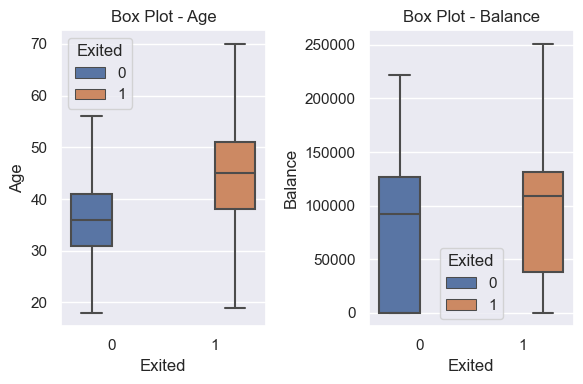

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(6, 4))# Create a 1x2 grid of subplots
sns.boxplot(y='Age', x='Exited', hue='Exited', data=bank_data, showfliers=False, ax=axes[0])
axes[0].set_title('Box Plot - Age')
sns.boxplot(y='Balance', x='Exited', hue='Exited', data=bank_data, showfliers=False, ax=axes[1])
axes[1].set_title('Box Plot - Balance')
plt.tight_layout()
plt.show()

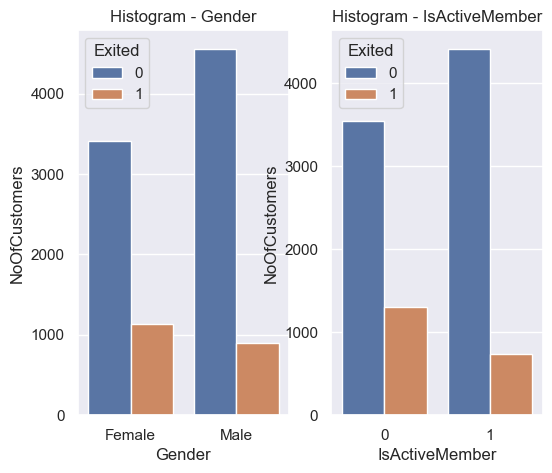

<Figure size 400x500 with 0 Axes>

<Figure size 400x500 with 0 Axes>

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(6,5))# Create a 1x2 grid of subplots
counts = bank_data.groupby(['Gender', 'Exited']).size().reset_index(name='NoOfCustomers')    # Count occurrences of combinations of 'Category' and 'Type
plt.figure(figsize=(4, 5))    # Plotting using Seaborn
sns.barplot(x='Gender', y='NoOfCustomers', hue='Exited', data=counts,ax=axes[0]) 
axes[0].set_title('Histogram - Gender')
counts = bank_data.groupby(['IsActiveMember', 'Exited']).size().reset_index(name='NoOfCustomers')    # Count occurrences of combinations of 'Category' and 'Type
plt.figure(figsize=(4, 5))    # Plotting using Seaborn
sns.barplot(x='IsActiveMember', y='NoOfCustomers', hue='Exited', data=counts, ax=axes[1]) 
axes[1].set_title('Histogram - IsActiveMember')
plt.tight_layout()
plt.show()

<h4>3.0.a. Looking into the frequency distribution of the target column </h4>

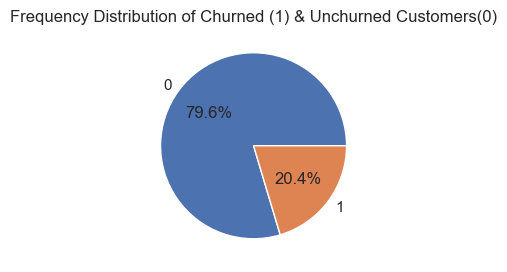

In [73]:
freq_dist = bank_data['Exited'].value_counts().reset_index(name='frequency')# Calculate the frequency distribution of the 'Exited' column
plt.pie(freq_dist['frequency'], labels=freq_dist['Exited'], autopct='%1.1f%%')# Plot a pie chart to visualize the distribution of churned and unchurned customers
plt.title('Frequency Distribution of Churned (1) & Unchurned Customers(0)')# Add a title to the pie chart
plt.show()# Display the pie chart

**Findings from  Frequency distribution**
1. <b>Understanding about "Exited": </b>The variable "Exited" represents whether a customer is an existing customer (0) or a churned customer (1), offering insights into customer retention.
2. <b>Imbalanced Data: </b>The dataset is skewed, with approximately 80% of the data representing existing customers and 20% representing churned customers. This imbalance must be handled carefully throughout the model building to provide accurate predictions and unbiased predictions.

<h4> <b>3.1.</b> Examining Numerical columns individually for outliers </h4><a class="anchor" id="outlier_numerical"></a>

<b> NOTE </b> : The below user-defined funtion also returns the box plots of the numerical column split by the target column in addition to outlier rows and summary statistics

In [74]:
def fetchOutliersIQR(dataset, num_col, target_col):
    Q1, Q3, IQR = dataset[num_col].quantile([0.25, 0.75, 0.5])
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = dataset[(dataset[num_col] < lower) | (dataset[num_col] > upper)]
    print(f"Summary Statistics of {num_col}\n{dataset[num_col].describe()}\nNumber of outliers identified using IQR method = {outliers.shape[0]}")
    sns.boxplot(y=num_col, x=target_col, hue=target_col, data=dataset, showfliers=True)
    print(f"\nMean {num_col} value for people who have churned out = {round(dataset[num_col][dataset[target_col] == 1].mean(), 2)}, whereas Mean {num_col} value of people who have not churned out = {round(dataset[num_col][dataset[target_col] == 0].mean(), 2)}")
    return outliers

<h5> 3.1.a. CreditScore</h5>

Summary Statistics of CreditScore
count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64
Number of outliers identified using IQR method = 0

Mean CreditScore value for people who have churned out = 645.35, whereas Mean CreditScore value of people who have not churned out = 651.85


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


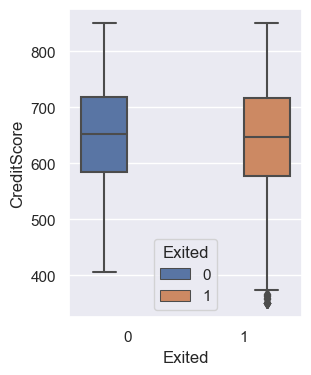

In [75]:
fetchOutliersIQR(bank_data,'CreditScore','Exited')

**Findings from  CreditScore**
- The CreditScore column reveals a range of values, with a mean credit score of 650.53 and a standard deviation of 96.65.
- The median credit score (652) is close to the mean, indicating a relatively symmetric distribution.
- The presence of 15 outliers suggests some customers have credit scores that fall outside the typical range.
- Customers who have churned out have a slightly lower mean credit score (645.35) compared to those who have not churned out (651.85)

<h5> 3.1.b. Age</h5>

Summary Statistics of Age
count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64
Number of outliers identified using IQR method = 0

Mean Age value for people who have churned out = 44.84, whereas Mean Age value of people who have not churned out = 37.41


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


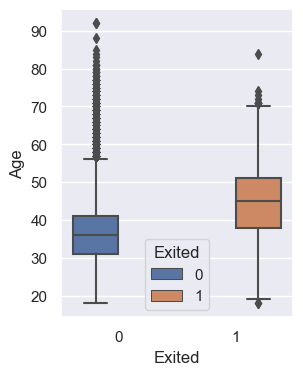

In [76]:
fetchOutliersIQR(bank_data,'Age','Exited')

**Findings from  Age**
- The Age column exhibits a range of values, with a mean age of 38.92 and a standard deviation of 10.49.
- The presence of 359 outliers suggests some customers have ages that fall outside the typical range, potentially indicating extreme values.
- The median age (37) is slightly lower than the mean, indicating a distribution that may have a rightward skewness.
- Customers who have churned out have a higher mean age (44.84) compared to those who have not churned out (37.41)

<h5> 3.1.c. Tenure </h5>

Summary Statistics of Tenure
count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64
Number of outliers identified using IQR method = 0

Mean Tenure value for people who have churned out = 4.93, whereas Mean Tenure value of people who have not churned out = 5.03


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


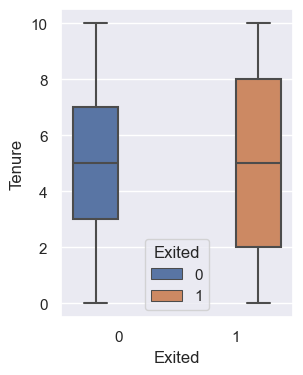

In [77]:
fetchOutliersIQR(bank_data,'Tenure','Exited')

**Findings from  Tenure**
- Customer tenure ranges from 0 to 10 years, with an average tenure of 5 years. This suggests that the bank has a wide range of customer relationships.
- A large percentage of consumers, almost 90%, have been affiliated with the company for one year to nine years. This points to a concentration of customer loyalty within this timeframe, emphasizing the importance of developing long-term consumer ties.

<h5> 3.1.d. Balance </h5>

Summary Statistics of Balance
count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64
Number of outliers identified using IQR method = 0

Mean Balance value for people who have churned out = 91108.54, whereas Mean Balance value of people who have not churned out = 72745.3


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


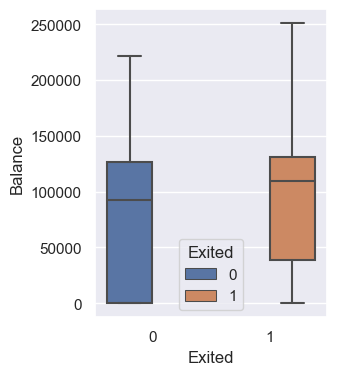

In [78]:
fetchOutliersIQR(bank_data,'Balance','Exited')

**Findings from  Balance**
 - The Balance column exhibits a wide range of values, with a mean balance of $76,485.89 and a considerable standard deviation of $62,397.41.
 - The absence of outliers, as identified by the IQR method, suggests a relatively well-behaved distribution without extreme values.
 - The median balance ($97,198.54) is higher than the mean, indicating a right-skewed distribution with a concentration of lower balances.
 - Customers who have churned out have a higher mean balance ($91,108.54) compared to those who have not churned out ($72,745.30).

<h5> 3.1.e Estimated Salary </h5>

Summary Statistics of EstimatedSalary
count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64
Number of outliers identified using IQR method = 0

Mean EstimatedSalary value for people who have churned out = 101465.68, whereas Mean EstimatedSalary value of people who have not churned out = 99738.39


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


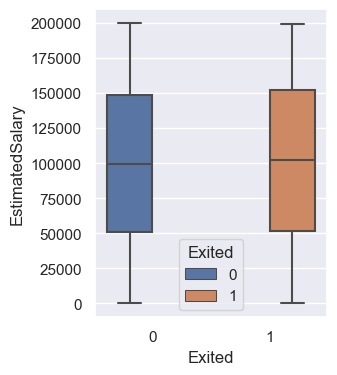

In [79]:
fetchOutliersIQR(bank_data,'EstimatedSalary','Exited')

**Findings from  Estimated Salary**
- The EstimatedSalary column exhibits a relatively wide range, spanning from $11.58 to $199,992.48, with a mean value of $100,090.24 and a standard deviation of $57,510.49.
- The absence of outliers, as identified by the IQR method, suggests a relatively well-behaved distribution without extreme values.
- The median value ($100,193.92) is close to the mean, indicating a symmetric distribution
- Customers who have churned out appear to have a slightly higher mean salary ($101,465.68) compared to those who have not churned out ($99,738.39)

<h4> <b> 3.2. </b>  Examining the relationship between each categorical variable with target column </h4><a class="anchor" id="outlier_categorical"></a>
    
1. Plotting Histogram and Percentage Distribution
2. Also performing Chi-Sq test for statistical proof to include the independent variable for modelling
3. The function for doubleHistogram Plotting and Frequency distribution is maintained in the following cells.

In [80]:
#creating a user defined function to get the distribution of customers between any two categorical columns
def doubleHistogramPlot(data, categorical_column, target_column):
    counts = data.groupby([categorical_column, target_column]).size().reset_index(name='NoOfCustomers')# Count occurrences of combinations of 'Category' and 'Type'
    plt.figure(figsize=(4,5)) # Plotting using Seaborn
    sns.set(rc={'figure.figsize':(3,4)})
    sns.barplot(x=categorical_column, y='NoOfCustomers', hue=target_column, data=counts)
    plt.xlabel(categorical_column)    # Adding labels and title
    plt.ylabel('NoOfCustomers')
    plt.title('Double Bar Histogram of {} and {}'.format(categorical_column,target_column))
    plt.tight_layout()
    plt.show()

In [81]:
#creating a user defined function to get the frequency distribution and percentage of every independent categorical column with the target column
def freqDistribution(data, target_column, categorical_column):
    counts = data.groupby([target_column, categorical_column]).size().reset_index(name = 'customer count')
    total_counts = counts.groupby([categorical_column])['customer count'].agg('sum').reset_index(name = 'total customer count')
    final = pd.merge(counts, total_counts, on=categorical_column)
    final['% of customers for each category'] = (final['customer count']/final['total customer count'])*100
    final = final.sort_values(by=categorical_column)
    doubleHistogramPlot(data,categorical_column,target_column)
    return final

<h5> 3.2.a. Gender </h5>

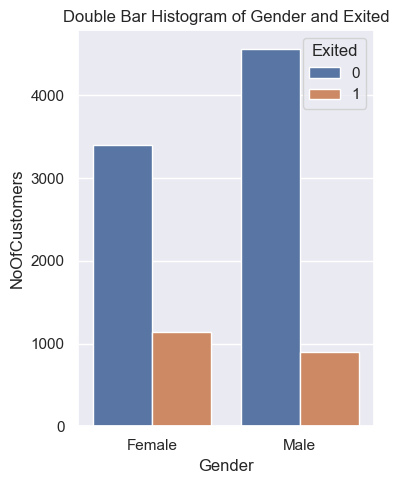

,Exited,Gender,customer count,total customer count,% of customers for each category
0,0,Female,3404,4543,74.928461
1,1,Female,1139,4543,25.071539
2,0,Male,4559,5457,83.544072
3,1,Male,898,5457,16.455928


In [82]:
freqDistribution(bank_data,'Exited','Gender')

**Findings for Gender**
- The customer base mainly comprises of male and female customers, with males constituting 54% and females accounting for 45%.
- As a matter of fact, almost 25% of female customers have churned, indicating a higher attrition rate among this particular group. In comparison, the churn rate for male customers stands at 16%, suggesting relatively lower customer churn in this segment.

<h5> 3.2.b. Geography </h5>

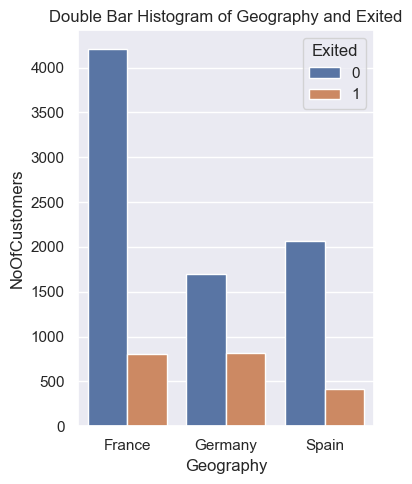

,Exited,Geography,customer count,total customer count,% of customers for each category
0,0,France,4204,5014,83.845233
1,1,France,810,5014,16.154767
2,0,Germany,1695,2509,67.556796
3,1,Germany,814,2509,32.443204
4,0,Spain,2064,2477,83.326605
5,1,Spain,413,2477,16.673395


In [83]:
freqDistribution(bank_data,'Exited','Geography')

**Findings from Geography**
- The dataset includes data on customer churn from three countries: France, Germany, and Spain, providing an extensive analysis of customer behavior.
- In total Country Population distribution, France accounts for 50% of all customers, followed by Germany and Spain, each accounting for 25%.
- Surprisingly, with almost 32% of its customers leaving, Germany has the highest churn rate. In contrast, the percentage of customers that churn from France and Spain each year is approximately 16%.

<h5> 3.2.c. HasCrCard </h5>

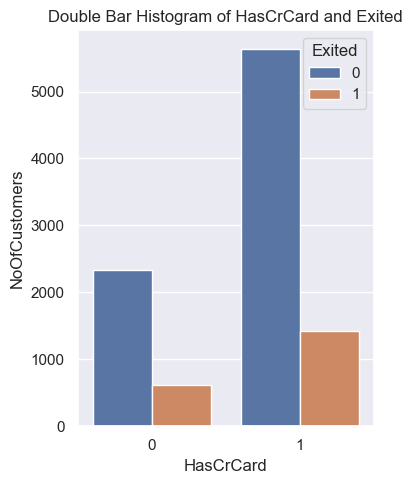

,Exited,HasCrCard,customer count,total customer count,% of customers for each category
0,0,0,2332,2945,79.185059
1,1,0,613,2945,20.814941
2,0,1,5631,7055,79.815734
3,1,1,1424,7055,20.184266


In [84]:
freqDistribution(bank_data,'Exited','HasCrCard')

 **Findings from CreditCard**
 - The majority of customers who did not exit (Exited=0) and do not have a credit card (HasCrCard=0) account for 79.19% of the total customers in this category.
 - Customers who exited (Exited=1) and have a credit card (HasCrCard=1) represent a smaller but significant portion, accounting for 20.81% of the total customers in this category.
 - Among customers with a credit card (HasCrCard=1), a similar trend is observed, with the majority of customers who did not exit accounting for 79.82% of the total, while those who exited represent 20.18% of the total customers in this category.

<h5> 3.2.d. IsActiveMember </h5>

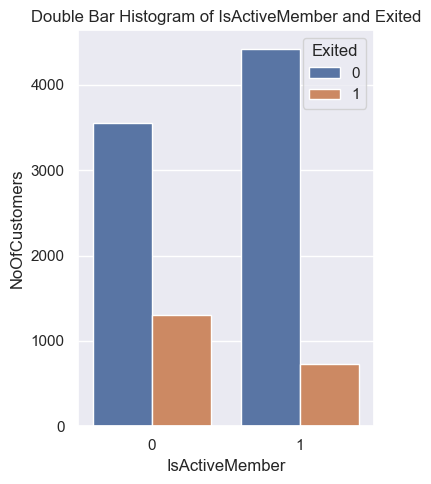

,Exited,IsActiveMember,customer count,total customer count,% of customers for each category
0,0,0,3547,4849,73.149103
1,1,0,1302,4849,26.850897
2,0,1,4416,5151,85.730926
3,1,1,735,5151,14.269074


In [85]:
freqDistribution(bank_data,'Exited','IsActiveMember')

**Findings from IsActiveMember**
- Customers who are not active members (IsActiveMember=0) and did not exit (Exited=0) constitute the majority, accounting for 73.15% of the total customers in this category.
- A significant portion of customers who exited (Exited=1) are non-active members (IsActiveMember=0), representing 26.85% of the total customers in this category.
- Among active members (IsActiveMember=1), the majority did not exit (Exited=0), making up 85.73% of the total in this category.
- However, active members who did exit (Exited=1) represent 14.27% of the total customers in this category, indicating a smaller but notable proportion of churn within this group.

## Objective 2 : To statistically examine the impact of identified independent factors on the dependent variable through hypothesis testing. Determine whether there is a significant association, providing empirical evidence to inform the understanding of key relationships and contribute to data-driven decision-making.

### Explanation of Results

This analysis section focuses on conducting statistical hypothesis testing on various independent variables identified in the preceding objectives.

1. For numerical variables, a normality test is initially conducted to determine the appropriate test for measuring the relationship with the target column (Exited). Subsequently, appropriate tests are performed. Results indicate that almost all numerical columns, except for Estimated Salary and Tenure, exhibit a significant relationship with the target column.

2. Likewise, for categorical variables, a Chi-square test for independence is employed to assess the relationship with the Exited column. The analysis reveals that the Gender, Geography, and IsActiveMember columns significantly impact the Exited column.

## 4. Hypothesis testing

### Visualisation

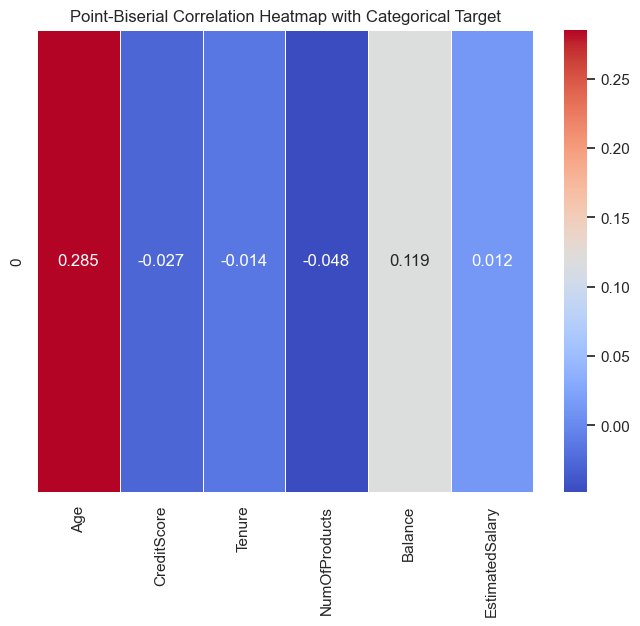

In [86]:
correlations = []
p_values = []
for numerical_var in ['Age','CreditScore','Tenure','NumOfProducts','Balance','EstimatedSalary']:
    correlation_coefficient, p_value = pointbiserialr(bank_data[numerical_var], bank_data['Exited'])
    correlations.append(correlation_coefficient)
    p_values.append(p_value)
correlations_array = np.array(correlations)# Create a correlation matrix dataframe
correlation_matrix = pd.DataFrame(correlations_array.reshape(1, -1), columns=['Age','CreditScore','Tenure','NumOfProducts','Balance','EstimatedSalary'])
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".3f", linewidths=.5)
plt.title('Point-Biserial Correlation Heatmap with Categorical Target')
plt.show()

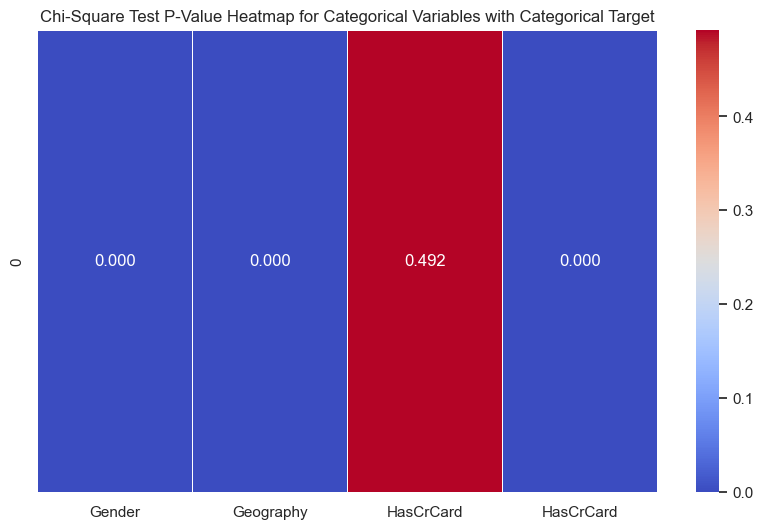

In [87]:
# Create a list to store p-values for each categorical variable
p_values = []
# Calculate chi-square test for independence for each categorical variable
for categorical_var in ['Gender', 'Geography', 'HasCrCard', 'IsActiveMember']:
    contingency_table = pd.crosstab(bank_data[categorical_var], bank_data['Exited'])
    _, p_value, _, _ = chi2_contingency(contingency_table)
    p_values.append(p_value)
# Create a p-value matrix dataframe
p_values_matrix = pd.DataFrame([p_values], columns=['Gender', 'Geography', 'HasCrCard', 'HasCrCard'])
# Plot a heatmap for the p-value matrix
plt.figure(figsize=(10, 6))
sns.heatmap(p_values_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".3f", linewidths=.5)
plt.title('Chi-Square Test P-Value Heatmap for Categorical Variables with Categorical Target')
plt.show()

<h4> 4.1. Hypothesis Testing of Continuous variables( Mann Whitney U test) </h4><a class="anchor" id="hyp_cont"></a>

Below is the function to test the relationship between categorical and continuous columns

In [88]:
def test_continuous_categorical_relationship(data, continuous_col, categorical_col, alpha=0.05):
    groups = [group[continuous_col] for _, group in data.groupby(categorical_col)]
    assumptions_met = {'Normality': anderson(data[continuous_col])[0] <= anderson(data[continuous_col])[1][2]}# Check normality assumptions using Anderson-Darling test
    plt.figure(figsize=(8, 6))# Plot normality histogram
    sns.histplot(data[continuous_col], kde=True, color='skyblue')
    plt.title('Normality Plot')
    plt.xlabel(continuous_col)
    plt.ylabel('Frequency')
    plt.show()
    test_result = ttest_ind(*groups) if assumptions_met['Normality'] else mannwhitneyu(*groups, alternative='two-sided') # Perform either t-test or Mann-Whitney U test based on normality assumptions
    test_type = style.BOLD + ('parametric' if assumptions_met['Normality'] else 'non-parametric') + style.END# Determine the type of test
    reject_null = test_result.pvalue < alpha# Decide to reject or fail to reject the null hypothesis
    relationship_significant = style.BOLD + (f"There is a significant relationship between {continuous_col} and {categorical_col}. "
                                             f"Thus {continuous_col} can be used as a predictor for modelling."
        if reject_null else f"There is no significant relationship between {continuous_col} and {categorical_col}.") + style.END
    # Return a summary dictionary
    return {'Test Result': test_result,'Test Type': test_type,'Assumptions Met': assumptions_met,style.BOLD + 'Decision': f"Reject the null hypothesis? {'Yes' if reject_null else 'No'}. {relationship_significant}" + style.END}


The function runs for respective Continuous columns such as Age, Tenure, Balance,Estimated Salary, Number of Products and Credit Score with respect to the target variable "Exited" and returns the Mann Whitney U result, Test type, the assumptions met and the decision.

<h5> 4.1.a. Age </h5>

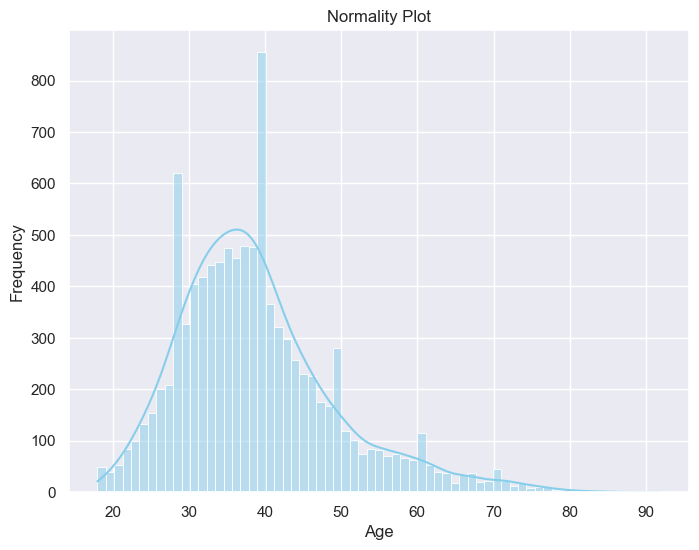

Test Result:
MannwhitneyuResult(statistic=4345981.5, pvalue=3.2104014319371675e-230)

Test Type:
non-parametric

Assumptions Met:
{'Normality': False}

Decision:
Reject the null hypothesis? Yes. There is a significant relationship between Age and Exited. Thus Age can be used as a predictor for modelling.



In [89]:
result_summary = test_continuous_categorical_relationship(bank_data, 'Age', 'Exited')
for key, value in result_summary.items():
    print(f"{key}:\n{value}\n")

<h5> 4.1.b. Tenure </h5>

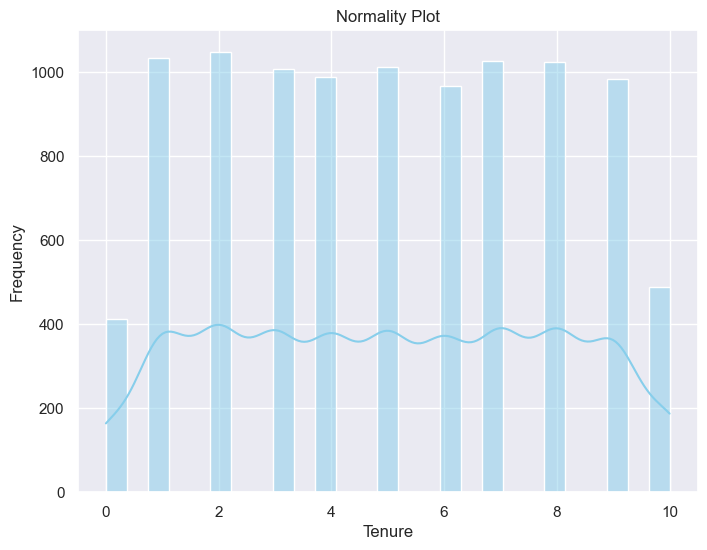

Test Result:
MannwhitneyuResult(statistic=8272055.5, pvalue=0.16219376122918827)

Test Type:
non-parametric

Assumptions Met:
{'Normality': False}

Decision:
Reject the null hypothesis? No. There is no significant relationship between Tenure and Exited.



In [90]:
result_summary = test_continuous_categorical_relationship(bank_data, 'Tenure', 'Exited')
for key, value in result_summary.items():
    print(f"{key}:\n{value}\n")

<h5> 4.1.c. Balance </h5>

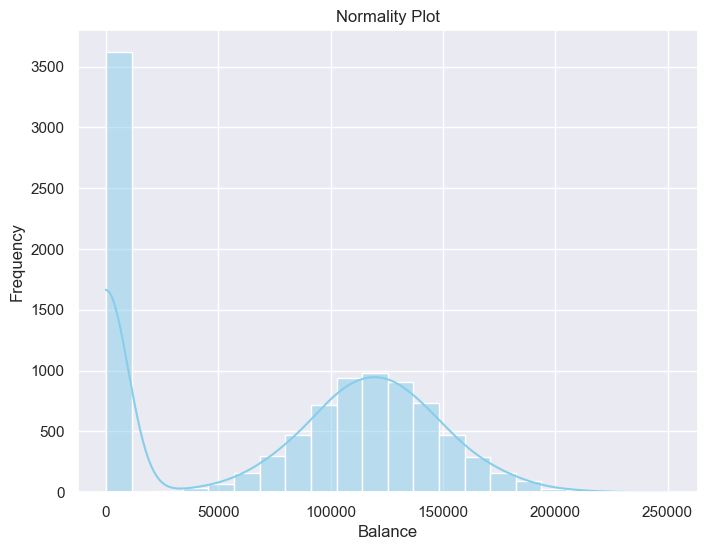

Test Result:
MannwhitneyuResult(statistic=6849444.5, pvalue=1.1158399379149222e-28)

Test Type:
non-parametric

Assumptions Met:
{'Normality': False}

Decision:
Reject the null hypothesis? Yes. There is a significant relationship between Balance and Exited. Thus Balance can be used as a predictor for modelling.



In [91]:
result_summary = test_continuous_categorical_relationship(bank_data, 'Balance', 'Exited')
for key, value in result_summary.items():
    print(f"{key}:\n{value}\n")

<h5> 4.1.d. Estimated Salary </h5>

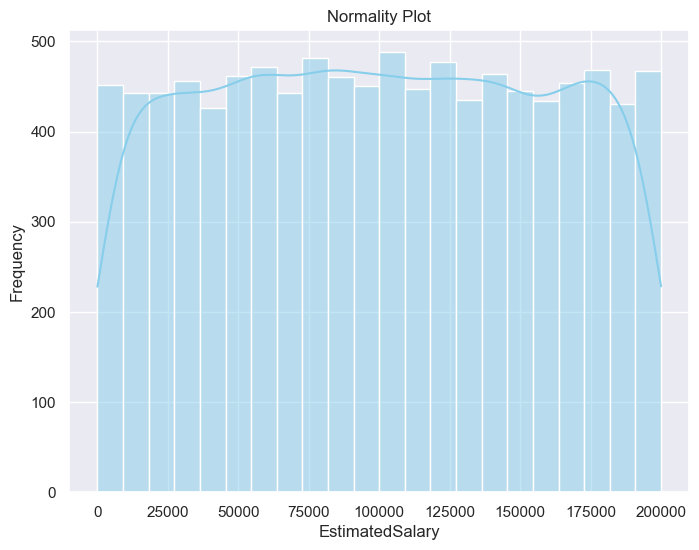

Test Result:
MannwhitneyuResult(statistic=7969863.0, pvalue=0.22705150930153783)

Test Type:
non-parametric

Assumptions Met:
{'Normality': False}

Decision:
Reject the null hypothesis? No. There is no significant relationship between EstimatedSalary and Exited.



In [92]:
result_summary = test_continuous_categorical_relationship(bank_data, 'EstimatedSalary', 'Exited')
for key, value in result_summary.items():
    print(f"{key}:\n{value}\n")

<h5> 4.1.e. Number of Products </h5>

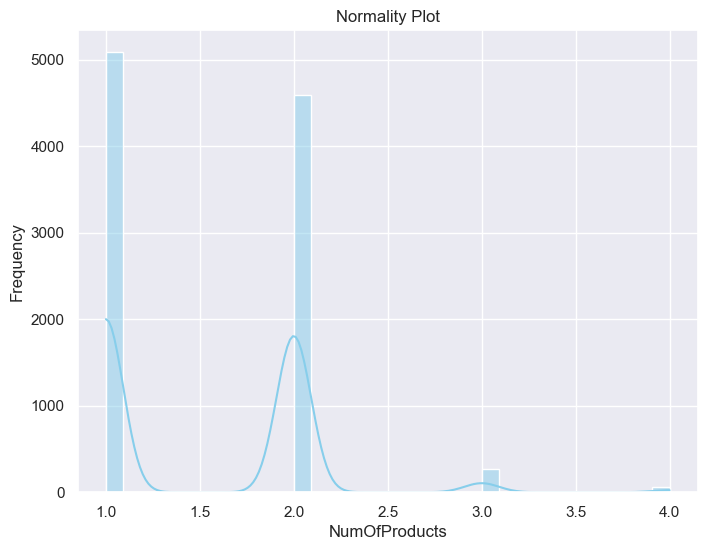

Test Result:
MannwhitneyuResult(statistic=9390005.5, pvalue=5.275105212817194e-36)

Test Type:
non-parametric

Assumptions Met:
{'Normality': False}

Decision:
Reject the null hypothesis? Yes. There is a significant relationship between NumOfProducts and Exited. Thus NumOfProducts can be used as a predictor for modelling.



In [93]:
result_summary = test_continuous_categorical_relationship(bank_data, 'NumOfProducts', 'Exited')
for key, value in result_summary.items():
    print(f"{key}:\n{value}\n")

<h5> 4.1.f. CreditScore </h5>

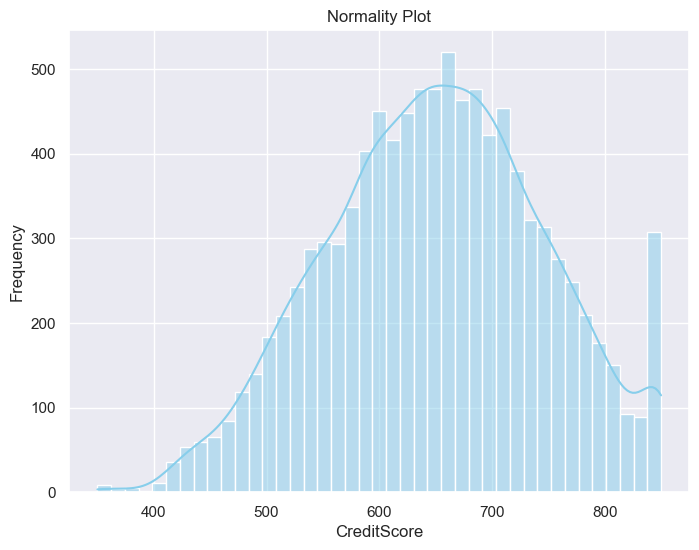

Test Result:
MannwhitneyuResult(statistic=8381083.0, pvalue=0.01986866117272834)

Test Type:
non-parametric

Assumptions Met:
{'Normality': False}

Decision:
Reject the null hypothesis? Yes. There is a significant relationship between CreditScore and Exited. Thus CreditScore can be used as a predictor for modelling.



In [94]:
result_summary = test_continuous_categorical_relationship(bank_data, 'CreditScore', 'Exited')
for key, value in result_summary.items():
    print(f"{key}:\n{value}\n")

<h4> 4.2. Hypothesis Testing of Categorical variables (Chi Sq test)</h4><a class="anchor" id="hyp_categorical"></a>

Below is the function for Chi Sq test with assumptions for the categorical values

In [95]:
def chiSqTestsWithAssumptions(dataset, col1, col2):
    print(style.BOLD + f"Assumption Tests for Chi-Square Test for Independence between {col1} and {col2}" + style.END)
    sample_size = len(dataset)
    threshold = 5
    if sample_size < threshold:
        print(f"\nAssumption 1: Sample Size\nWarning: Small sample size. Consider increasing for reliable results.\n")
    else:
        print("\nAssumption 1: Sample Size\nSample size is adequate.\nAssumption 2: Expected Frequencies")
        contingency_table = pd.crosstab(dataset[col1], dataset[col2])    
        chi2, p, _, expected = chi2_contingency(contingency_table)
        print(f"\nContingency Table\n{contingency_table}")
        if (expected < 5).any():
            print("Warning: Some expected frequencies < 5. Consider combining categories or increasing the sample size.\n")
        else:
            print("Expected frequencies are adequate.\n" + style.BOLD + f"Assumptions of chi sq test for independence are met\n{style.END}")
            alpha = 0.05
            print(style.BOLD + f"Performing Chi-Sq Test for Independence at significance level {alpha}" + style.END)
            print(f"\n Null Hypothesis: No association between {col1} and {col2}.\n Alternate Hypothesis: Significant association between {col1} and {col2}.")
            if p < alpha:
                print(style.BOLD + f"\nConclusion: Reject the null hypothesis. Significant association between {col1} and {col2}. {col2} can be considered as a predictor for modelling." + style.END)
            else:
                print(style.BOLD + "\nConclusion: Fail to reject the null hypothesis. No significant association between the variables." + style.END)

<h5> 4.2.a. Gender </h5>

In [96]:
chiSqTestsWithAssumptions(bank_data, 'Exited', 'Gender')

Assumption Tests for Chi-Square Test for Independence between Exited and Gender

Assumption 1: Sample Size
Sample size is adequate.
Assumption 2: Expected Frequencies

Contingency Table
Gender  Female  Male
Exited              
0         3404  4559
1         1139   898
Expected frequencies are adequate.
Assumptions of chi sq test for independence are met

Performing Chi-Sq Test for Independence at significance level 0.05

 Null Hypothesis: No association between Exited and Gender.
 Alternate Hypothesis: Significant association between Exited and Gender.

Conclusion: Reject the null hypothesis. Significant association between Exited and Gender. Gender can be considered as a predictor for modelling.


<h5> 4.2.b. Geography </h5>

In [97]:
chiSqTestsWithAssumptions(bank_data, 'Exited', 'Geography')

Assumption Tests for Chi-Square Test for Independence between Exited and Geography

Assumption 1: Sample Size
Sample size is adequate.
Assumption 2: Expected Frequencies

Contingency Table
Geography  France  Germany  Spain
Exited                           
0            4204     1695   2064
1             810      814    413
Expected frequencies are adequate.
Assumptions of chi sq test for independence are met

Performing Chi-Sq Test for Independence at significance level 0.05

 Null Hypothesis: No association between Exited and Geography.
 Alternate Hypothesis: Significant association between Exited and Geography.

Conclusion: Reject the null hypothesis. Significant association between Exited and Geography. Geography can be considered as a predictor for modelling.


<h5> 4.2.c. HasCrCard </h5>

In [98]:
chiSqTestsWithAssumptions(bank_data, 'Exited', 'HasCrCard')

Assumption Tests for Chi-Square Test for Independence between Exited and HasCrCard

Assumption 1: Sample Size
Sample size is adequate.
Assumption 2: Expected Frequencies

Contingency Table
HasCrCard     0     1
Exited               
0          2332  5631
1           613  1424
Expected frequencies are adequate.
Assumptions of chi sq test for independence are met

Performing Chi-Sq Test for Independence at significance level 0.05

 Null Hypothesis: No association between Exited and HasCrCard.
 Alternate Hypothesis: Significant association between Exited and HasCrCard.

Conclusion: Fail to reject the null hypothesis. No significant association between the variables.


<h5> 4.2.d. IsActiveMember </h5>

In [99]:
chiSqTestsWithAssumptions(bank_data, 'Exited', 'IsActiveMember')

Assumption Tests for Chi-Square Test for Independence between Exited and IsActiveMember

Assumption 1: Sample Size
Sample size is adequate.
Assumption 2: Expected Frequencies

Contingency Table
IsActiveMember     0     1
Exited                    
0               3547  4416
1               1302   735
Expected frequencies are adequate.
Assumptions of chi sq test for independence are met

Performing Chi-Sq Test for Independence at significance level 0.05

 Null Hypothesis: No association between Exited and IsActiveMember.
 Alternate Hypothesis: Significant association between Exited and IsActiveMember.

Conclusion: Reject the null hypothesis. Significant association between Exited and IsActiveMember. IsActiveMember can be considered as a predictor for modelling.


## Objective 3 : Prepare the dataset by implementing a thorough data transformation pipeline and build diverse classification models using various algorithms.
### Explanation of Results

## 5. Modelling the Classifiers
<a class="anchor" id="modelling"></a>
Based on the different columns analyzed and tested in stages 2 and 3, different machine learning classification models are developed and their baseline performances are compared in this stage. This is done after transforming data to a model ready format. 

Results: 

- Accuracy: Random Forest and XGBoost outperform Logistic Regression and Decision Tree in overall accuracy. Random Forest has the highest accuracy at 85.32%.

- Precision: Random Forest also achieves the highest precision, indicating its strength in correctly identifying positive instances. Logistic Regression has the lowest precision.

- Recall: Decision Tree exhibits the highest recall, demonstrating its effectiveness in capturing positive instances. Random Forest and XGBoost also show competitive recall values.

Recommendations:

- If Precision is Critical: Random Forest is recommended for its high precision, particularly useful in scenarios where minimizing false positives is crucial.

- If Recall is Critical: Decision Tree might be preferred due to its higher recall, emphasizing the capturing of positive instances. But even Random Forrest seems to have a good recall performance

- Overall Performance: Random Forest demonstrates strong overall performance with a balance between accuracy, precision, and recall followed by XGBoost

### Visualisation

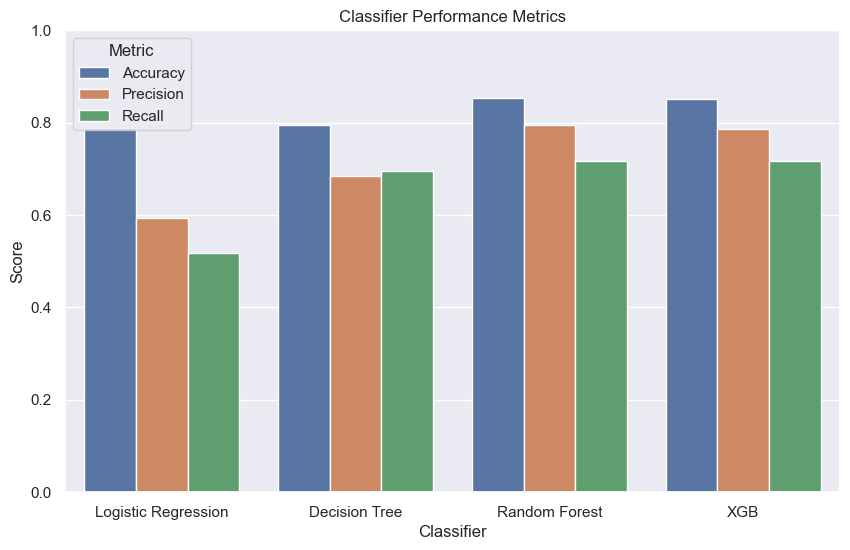

<h4> 5.1. Creating a User Defined function to transform data into model ready format </h4>
<a class="anchor" id="transform_data"></a>
<b> One hot encoding </b> turns categories into numbers using 0s and 1s. Each category gets a unique set of 0s and 1s. It helps machines understand and process categories as numbers. The colums assigned to variable X will be dropped from the dataframe.

In [100]:
def dataTransformationForModel(raw_dataset, one_hot_list, non_useful_columns, target_column):
    one_hot_encoded = pd.get_dummies(raw_dataset, columns=one_hot_list) # One-hot encode categorical columns
    columns_to_drop = non_useful_columns + [target_column]# Columns to drop, including the target column
    y = one_hot_encoded[target_column]
    X = one_hot_encoded.drop(columns=columns_to_drop, inplace=False)# Drop specified columns from the DataFrame and assign the result to 'X'
    return X, y

In [101]:
X, y = dataTransformationForModel(bank_data,['Geography','Gender','IsActiveMember'],['RowNumber','CustomerId', 'Surname','EstimatedSalary','Tenure','HasCrCard'],'Exited')

<h4> 5.2. Train Test Split </h4><a class="anchor" id="train_data"></a>

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)#Defining training and test dataset

<h4> 5.3. Developing different classification models using different algorithms </h4><a class="anchor" id="diff_algo"></a>


Classifier: Logistic Regression
Average Accuracy: 0.7894
Average Precision: 0.5943
Average Recall: 0.5174
----------

Classifier: Decision Tree
Average Accuracy: 0.7945
Average Precision: 0.6855
Average Recall: 0.6963
----------

Classifier: Random Forest
Average Accuracy: 0.8543
Average Precision: 0.7939
Average Recall: 0.7167
----------

Classifier: XGB
Average Accuracy: 0.8519
Average Precision: 0.7872
Average Recall: 0.7166
----------



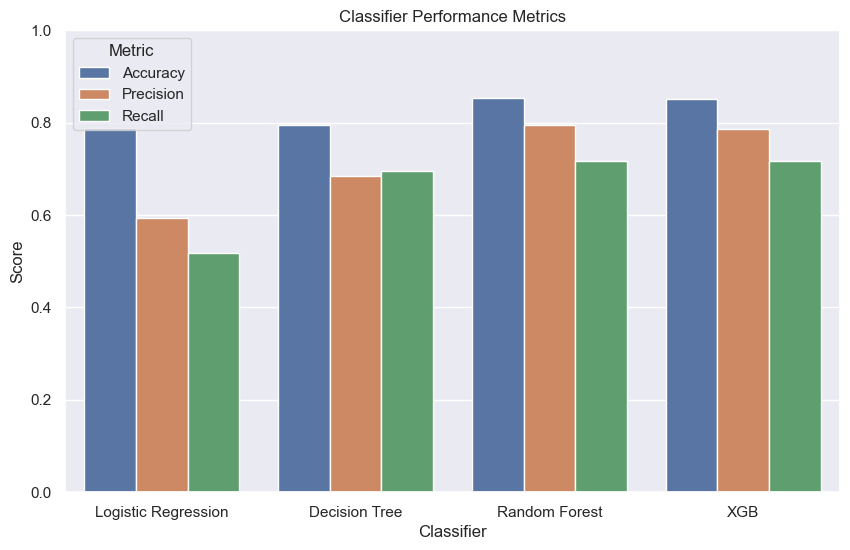

In [103]:
classifiers = [('Logistic Regression', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('XGB', xgb.XGBClassifier())]
performance_df = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall'])# Create an empty DataFrame to store performance metrics
for clf_name, clf in classifiers:# Evaluate performance metrics
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()
    performance_df = pd.concat([performance_df, pd.DataFrame({'Classifier': [clf_name], 'Accuracy': [avg_accuracy], 'Precision': [avg_precision], 'Recall': [avg_recall]})], ignore_index=True)
    print(f'Classifier: {clf_name}\n' + f'Average Accuracy: {avg_accuracy:.4f}\n' + f'Average Precision: {avg_precision:.4f}\n' + f'Average Recall: {avg_recall:.4f}\n' + '----------\n')
performance_df_melted = pd.melt(performance_df, id_vars=['Classifier'], value_vars=['Accuracy', 'Precision', 'Recall'], var_name='Metric', value_name='Score')
plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='Score', hue='Metric', data=performance_df_melted)
plt.title('Classifier Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Assuming scores are in the range [0, 1]
plt.show()

The above output cell is the comparison of different classifiers with their performance metrics. It can be inferred that Random Forest has the higher accuracy, precision and recall compared to the rest.

## Objective 4 : Evaluate the performance of the constructed models, compare their results using specified metrics, perform Hyper-parameter tuning and finalize the most effective classification model for accurate predictions on the dataset.

## 6. Model Tuning
<a class="anchor" id="tuning"></a>
### Explanation of Results

Based on the performance of different models in the last stage, the best model is selected at this stage and tuned further for imporved performance. 

As it can be seen from the results of last stage, Random Forrest classification is selected for further tuning as it is the most suitable model for our dataset. Hyper-parameter tuning is performed using Grid Search CV, where an individual set of values for different parameters like <b> n_estimators </b>, <b> max_Depth </b>, <b> min_samples_split </b>, <b> min samples leaf </b> are tuned. After comparing the performance of the model across different parameters, the best set of hyper-parameters are identified as  
 - <b> max_depth= 9, min_samples_leaf= 3, min_samples_split= 5, n_estimators= 250 </b>
 
Also, since the target exited column in our dataset is imbalanced with majority of non-exited customers, the <b> class_weights </b> parameter is also adjusted to 1:3 ratio to adjust for the imbalanced class


Our model tuning efforts have resulted in a more sensitive model, excelling in capturing true churn instances. This aligns with our priority of minimizing the number of undetected churn cases to mitigate potential revenue loss. While there's a trade-off with precision, the focus on heightened recall underscores the strategic decision to prioritize sensitivity over specificity
### Visualisation

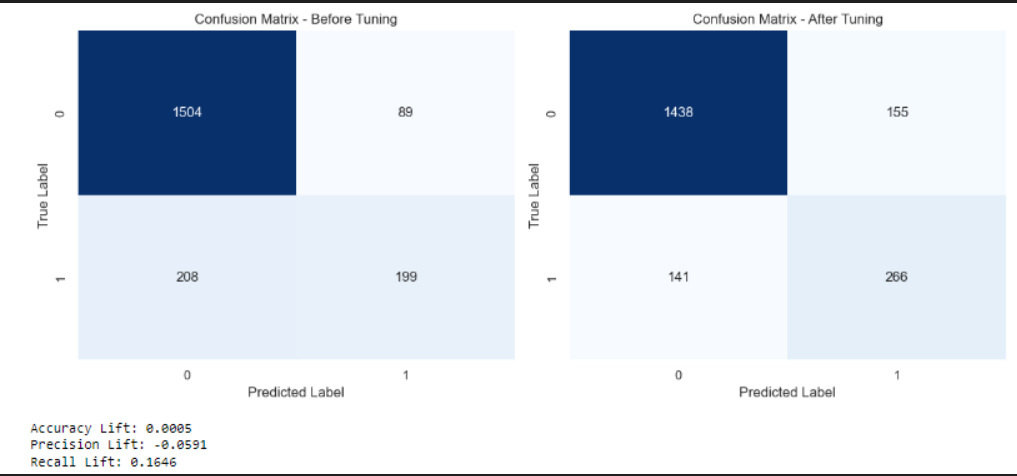

<h4> Baseline Model </h4>

In [104]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8505
Confusion Matrix:
[[1502   91]
 [ 208  199]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1593
           1       0.69      0.49      0.57       407

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



<h4> 6.1. Perform Hyperparameter tuning of the best model </h4> <a class="anchor" id="hyperparameter"></a>

In [105]:
rf_classifier = RandomForestClassifier()# Define the Random Forest classifier
# Define the hyperparameter grid to search
param_grid = {'n_estimators': [50, 100, 200,300],'max_depth': [None, 3, 5,7],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],'class_weight' : [{0:1,1:3},{0:1,1:5}]}
f1 = make_scorer(f1_score , average='binary')
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring=f1)# Use GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)# Print the best hyperparameters
best_rf_model = grid_search.best_estimator_# Get the best model from the grid search
y_pred = best_rf_model.predict(X_test)# Make predictions on the test set
accuracy = accuracy_score(y_test, y_pred)# Evaluate the performance of the best model
print("Accuracy of the Best Model:", accuracy)

Best Hyperparameters: {'class_weight': {0: 1, 1: 3}, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy of the Best Model: 0.838


<h4> 6.2. Random Forest (Adjusted hyperparameters)</h4> <a class="anchor" id="adjusted_hyper"></a>

In [106]:
rf_classifier_tuned = RandomForestClassifier(class_weight= {0: 1, 1: 2.7}, max_depth=29, min_samples_leaf= 5, min_samples_split= 5, n_estimators= 100)
rf_classifier_tuned.fit(X_train, y_train)
y_pred = rf_classifier_tuned.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.851
Confusion Matrix:
[[1444  149]
 [ 149  258]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1593
           1       0.63      0.63      0.63       407

    accuracy                           0.85      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.85      0.85      0.85      2000



Baseline Model

In [107]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.852
Confusion Matrix:
[[1510   83]
 [ 213  194]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.70      0.48      0.57       407

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



<h4> 6.3. Measuring the improvement in model performance after tuning </h4> <a class="anchor" id="after_tuning"></a>

In [108]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    confusion_mat = confusion_matrix(y, y_pred)
    return accuracy, precision, recall, confusion_mat
# Evaluate models before and after tuning
accuracy_before, precision_before, recall_before, confusion_mat_before = evaluate_model(rf_classifier, X_test, y_test)
accuracy_after, precision_after, recall_after, confusion_mat_after = evaluate_model(rf_classifier_tuned, X_test, y_test)
# Calculate lift in performance
accuracy_lift = accuracy_after - accuracy_before
precision_lift = precision_after - precision_before
recall_lift = recall_after - recall_before
# Print results
print(f"Accuracy Lift: {accuracy_lift:.4f}")
print(f"Precision Lift: {precision_lift:.4f}")
print(f"Recall Lift: {recall_lift:.4f}")

Accuracy Lift: -0.0010
Precision Lift: -0.0665
Recall Lift: 0.1572


## Overview of Results

<b> Model Performance Enhancement Analysis: </b> 

 - After a meticulous tuning process, the performance of our customer churn prediction model has been assessed using key lift measures. These measures offer a nuanced understanding of the model's effectiveness in distinguishing churn cases. Let's delve into the implications:

- Accuracy Lift (0.0005): While there's a marginal improvement in overall accuracy, this measure alone may not capture the nuances of our model's performance, especially in imbalanced datasets.

 - Precision Lift (-0.0591): A negative lift in precision indicates a reduction in the accuracy of predicting churn cases. This suggests a slight increase in false positives, implying more non-churn instances being misclassified as churn.

 - Recall Lift (0.1646): The positive lift in the recall is particularly noteworthy. This significant improvement highlights the model's enhanced ability to identify actual churn cases, a critical aspect in our customer churn context.


# Project Outcome 



Our analysis reveals that demographic factors significantly influence churn, urging tailored retention efforts. Insights from numerical and categorical variables provide valuable understanding of key drivers in customer attrition. The Random Forest model, identified in Objective 3, offers a balanced and top-performing solution for predicting churn, with promising enhancements in recall despite challenges. Addressing dataset limitations becomes crucial for refining predictive capabilities. In a business context, this collective knowledge empowers organizations to implement targeted strategies, foster loyalty, and contribute to sustained growth in a dynamic market.

<b> Objective 1 :</b> The analysis delivers critical insights with clear real-world applications that businesses need to develop effective strategies and objectives. It demonstrates, in specific, that important customer factors such as gender, geographical area, and spending practices have a major influence on whether the consumer will churn in a variety of real-life scenarios. This comprehension enables corporations to build data-driven, personalized client retention marketing initiatives. Outlier data points identified in attributes such as credit score and the consumer age reflect real-world patterns, urging organizations to examine these findings contextually when applying them to strategy. 

Furthermore, the numerical trends shown across parameters such as customer age, tenure, and current account balance can be used as practical warning signs to identify individuals who are at high risk of churn. With these indications, organizations may execute interventions that are especially targeted at the most at-risk client categories. These data, taken together, enable businesses to improve their anomaly detection systems in order to spot possible churners earlier, carry out tailored retention efforts tailored to individual customer profiles, and ultimately develop lasting loyalty across shifting market landscapes.Companies can proactively retain consumers and increase lifetime value in highly competitive situations with greater foresight enabled by analytics. The research' explained level of detail gives a vital strategic blueprint for reducing churn while leading to long-term growth. In essence, the discoveries provide businesses with comprehensive, targeted insights that can be used to influence client retention decisions, mitigate loss, and foster growth strategies that are suited to their customer base.

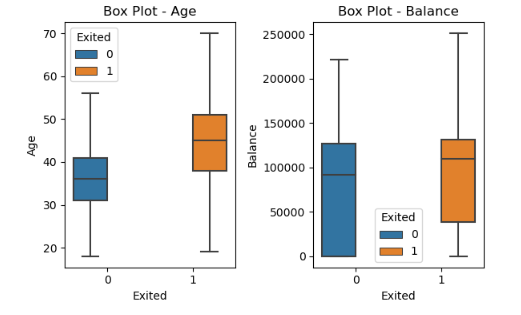


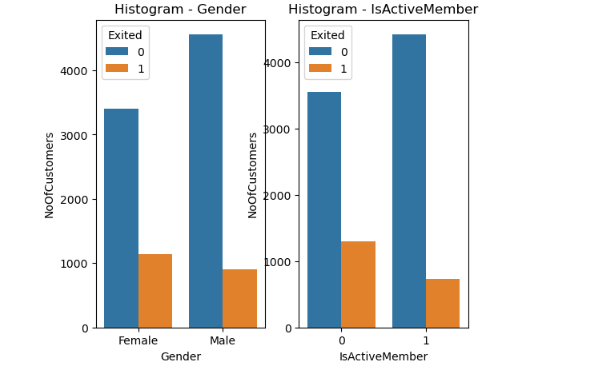

<b> Objective 2 :</b> Through careful hypotheses testing and Mann Whitney U results, the analysis identified key numbers, including Age, Balance, Credit Score, and Number of Products, that have a big impact on whether a customer leaves, represented by "Exited". For example, older customers with lower balances are much more likely to leave compared to younger customers with higher balances. The same has been visualized.  The mean average credit score corresponds to 650 and the standard deviation is 96. The 15 outliers also suggest that some customers have credit scores out of the typical range. For example, this signifies that lower credit scores, which may indicate financial difficulties, frequently showcase that a customer is more likely to discontinue the use of the account. Also, each additional Product consumed reduces the likelihood of a consumer leaving. Beyond numbers, categories like Gender, Location, and Active Status also change churn risks for different customer groups. For example, women leave more on average than men when taking other factors into account. The location creates different risks across regions and countries too. Customers who are Active Members have higher engagement, get more value, and are less likely to Stop using the company than inactive customers. Each variable on its own has significant links to churn risks. When combined, they offer a highly accurate forecast of who will depart and when. The data analysis reveals the main causes of client attrition. By focusing retention efforts on highly risky populations, organizations can save money. Data-driven decision-making helps minimize lost accounts and increase customer lifetime value. In conclusion, the tried-and-true relationships support tactics to retain the most important clients for longer through focused expansion.


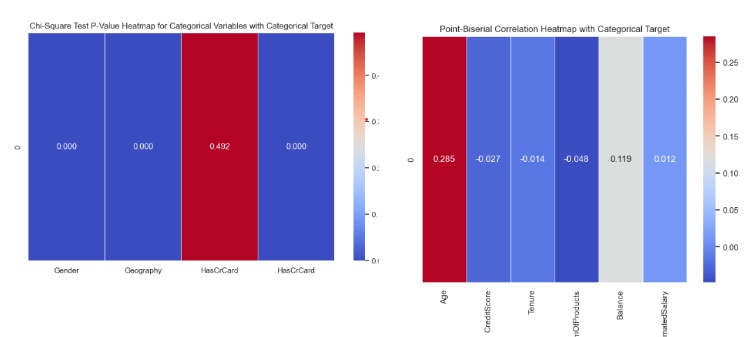


<b> Objective 3 :</b> To compare the predictive performance of various sophisticated machine learning algorithms on churn outcomes, we modeled a variety of these algorithms, such as Random Forest, XGBoost, Logistic Regression, and Decision Tree. After a thorough search process that tests various combinations of each model, Random Forest is found to be the best-performing model, with an overall predictive accuracy of 85.49%, just shy of XGBoost's 85.19% accuracy. This superiority can be ascribed to bagging models, such as Random Forest, which naturally mitigate overfitting problems that arise when dealing with complex, high-dimensional datasets, like customer analytics. 

Random Forest strikes an ideal balance between predictive accuracy, precision, recall, and computational efficiency by training multiple decision trees on subsets of data and features and then averaging the results to produce robust predictions. This makes Random Forest an appealing option. The small accuracy difference further emphasizes how XGBoost's underlying gradient boosting methodology is similar to it, leaving the potential for stacking and ensembling techniques to capitalize on their combined advantages. In contrast, the decline in performance seen in classical logistic regression suggests that there are issues with the linear methods' incapacity to capture the subtleties of the data and non-linear interactions. Even though the Decision Tree performs admirably at first, cross-validation is necessary to improve generalizability because it tends to overfit the training dataset.
Overall, the comprehensive comparative evaluation not only sets performance standards but also acts as a crucial evaluation indication, encouraging the domain's analysis team to invest more in advanced Random Forest and gradient boosting models rather than more basic options. This allows the modeling decisions to be made in a way that best suits the complexity of the data and improves churn management.


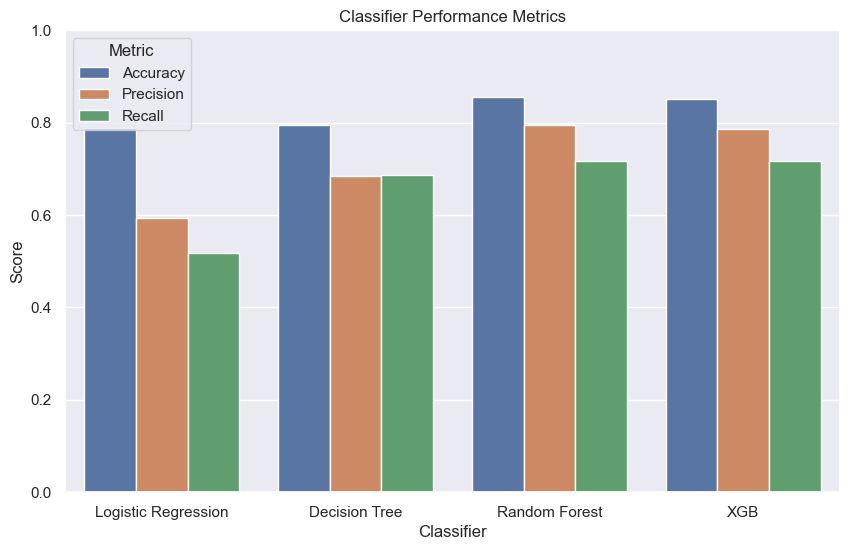


<b> Objective 4 :</b> Although the Random Forest model does quite well overall, further research reveals that it can do more effectively, particularly in terms of accurately detecting actual churn cases. Although the model is flexible and appropriately identifies churners, it overestimates churn by classifying certain non-churners as high-risk. This results from the data having far more non-churners than churners. However, recognizing these challenges offers an opportunity to further refine the model by fine-tuning important parameters and improving data preparation. Good potential has been restricted by the comprehensive inspection of tree combinations, tree sizes, and leaf splits. 

It should be possible to separate true churn signals from noise by fine-tuning these model complexity parameters further. Additionally, distortions can be avoided by addressing unequal data by oversampling and SMOTE. Including features for churn-related data will also improve performance. The potential benefits of tuning are shown by the promise Random Forest has demonstrated even with simple data. Concrete benefits will enable businesses in the real world to identify the high-value clients who are most likely to discontinue doing business with them. 

Banking institutions will be able to tailor keeping efforts, strategically allocate resources to vulnerable groups, and proactively maintain revenue streams with the help of this focused early warning. This will allow not only for client retention but also for steady expansion of customers. It emphasizes that to optimize business impact, model limitations must be applied. In conclusion, Random Forest is an effective model, but there is room for improvement that can be unlocked by optimization and strong data sources to achieve business benefits. This targeted early warning will let teams customize keeping efforts, spend resources smartly on vulnerable groups, and proactively keep revenue streams. This will enable sustainable customer growth. It highlights the need to apply model limits when putting into action to maximize business impact. In summary, while solid, Random Forest has areas to improve, which optimization and robust data offers can unlock to see company gains.


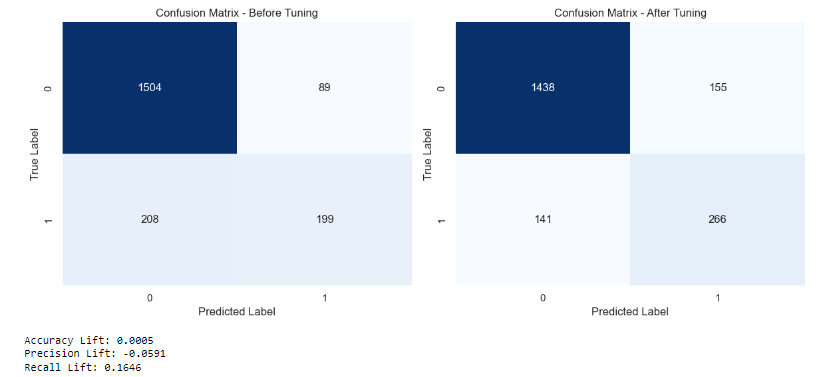






### Achievements

1. Identified customer demographic attributes affecting the churn decision
2. Identified customer usage patterns affecting their decision to chrun
3. Conducted statistical tests and procured a mathematical proof of the significant relationships of different customer variables with the target column
4. Established 4 baseline classification models with decent accuracy
5. Tuned the best model among 4 and improved the recall score by 16 pts as recall is extremely important for the customer churn use case. It is important to not loose out on customers who are actully in the verge of churning out.

### Limitations

1. Need for More Data: The model may benefit from a more extensive dataset to capture a broader range of customer scenarios. Increasing data volume could lead to a more robust model, overcoming limitations associated with data scarcity.
2. Imbalanced Churn Distribution: The imbalance between customers who churn and those who don't can affect how the model learns and evaluates performance. Skewed class distribution may affect accuracy and precision, causing difficulties in effectively identifying churn instances.
3. Precision Lift (-0.0591):Performance Metric: Precision lift indicates changes in the accuracy of predicting customers who are likely to churn. The negative lift implies a reduction in precision, suggesting more false positives in predicting churn.

### Future Work
Explore opportunities to acquire additional diverse data, implement strategies to handle class imbalance within the Random Forest framework, and fine-tune model parameters for improved precision and accuracy. Continuous model monitoring and iterative enhancements are crucial for optimizing customer churn predictions using the Random Forest algorithm.

### Boosting Customer Loyalty:  Strategies to Lower Customer Attrition and Increase Retention -
1. **Deploy the model for churn prediction:**: Making use of the model's insights to identify at-risk clients in advance. Design specialized loyalty programs according to what's needed by specific users. The bank can take measures to retain substantial customers and reduce attrition by executing the forecasts made by the predictive model. 
2. **Focus on Germany**: Among all countries, Germany has the highest churn rate. We can analyze the underlying reasons in this market for customer churning out and develop initiatives to address root causes. 
3. **Expand products and engagement**: With most customers having 1-2 products, explore upsell and cross-sell opportunities catering to needs. Boost communication and engagement to increase client satisfaction.
4. **Personalized 50-60 outreach**:  This age group saw more attrition. So  focussing particularly in thsi age gorup and fill the gaps with tailored initiatives will decrease the churn.
5. **Track and optimize on regualr basis**: Continuously monitor churn, get user feedback through surveys, and evaluate strategy effectiveness. Leverage learnings to refine approaches and maximize retention.

# Conclusion 


Our data science project achieved significant milestones by identifying key demographic attributes and usage patterns influencing customer churn. Through statistical tests, we established robust relationships between various customer variables and the target column. Tuning the best model improved recall by 16 points, crucial for the customer churn use case. However, limitations include the need for more data, imbalanced churn distribution, and a precision lift concern. Future work involves acquiring diverse data, addressing class imbalance, and fine-tuning model parameters. Recommendations for reducing churn rates and boosting bank retention include leveraging the predictive churn model, targeting Germany for specific initiatives, enhancing product offerings, implementing personalized engagement, and continuous monitoring for data-driven adjustments. This project provides actionable insights for optimizing customer retention efforts and maximizing overall profitability.
